<p>
<img alt="CC" height="70px" src="https://creativecommons.org/images/deed/cc_blue_x2.png" align="left" hspace="0px" vspace="0px">
<img alt="Attribution" height="70px" src="https://creativecommons.org/images/deed/attribution_icon_blue_x2.png" align="left" hspace="0px" vspace="0px">
<img alt="NC" height="70px" src="https://creativecommons.org/images/deed/nc_blue_x2.png" align="left" hspace="0px" vspace="0px">
<img alt="SA" height="70px" src="https://creativecommons.org/images/deed/sa_blue_x2.png" align="left" hspace="0px" vspace="0px">
</p>

<div align="right">
<h1> <b> Elaborado por Edgar Castilla. </b> </h1>

</div>

# **Prueba de hipótesis diferencia de medias**

**Documentos de ayuda**:
  

*   Python Website. (2021). Python 3.9.1 documentation. Retrieved February 03, 2021, from https://docs.python.org/
*   W3schools.com. (2021). Python tutorial. Retrieved February 04, 2021, from https://www.w3schools.com/python/default.asp
*   realpython.com. (2021). Real Python Tutorials. Retrieved February 04, 2021, from https://realpython.com/

**Importamos las librerías**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Fórmula de la distribución normal con media $\mu$ y desviación $\sigma$, varianza $\sigma^2$**

f(x)=(1/$\sigma$*$\sqrt{ 2*\pi  }$)*${exp}^-\frac{(x-\mu)^2}{2*\sigma^2}$

## Distribución Normal 


$$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left[-\frac{1}{2}\left(\frac{x-\mu}{\sigma} \right)^2 \right]}$$

* $\mu$: media de la distribución
* $\sigma$: desviación estándar de la distribución

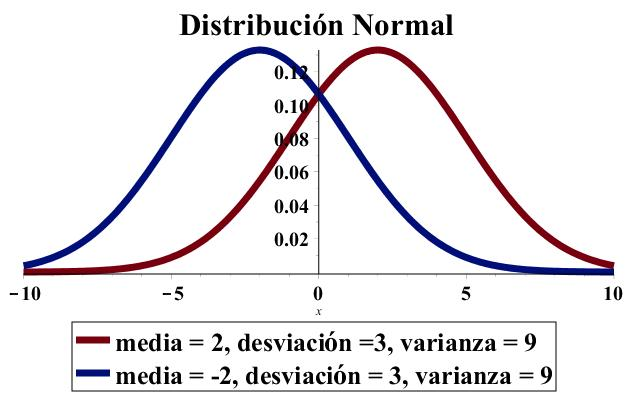

In [ ]:
from IPython.display import Image
Image('grafico 5 distribucion normal con maple.jpg')

**Gráfica de distribución Normal con ${\mu}$ = media = 0 , $\sigma$ = desviación = 1**

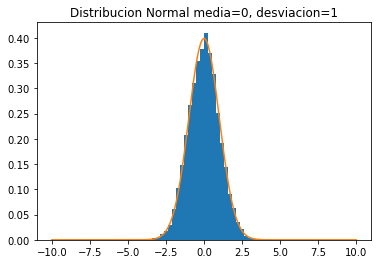

In [ ]:
mu = 0 ,  # Media de la distribución
sigma = 1, # Desviación estandar
var = sigma**2
t = np.arange(-10,10,0.01)
y = 1/np.sqrt(2*np.pi)*sigma*np.exp(-(t-mu)**2/(2*sigma**2))
rand = np.random.normal(mu,var,10000)
plt.hist(rand,30,density=True)
plt.title('Distribución Normal media=0, desviación=1')
plt.plot(t,y)
plt.show()

**Instalación de la librería scipy**

In [ ]:
!pip install scipy

**Instalación de librerías:<br>matplotlib es para gráficos.<br>plotly para gráficos dinámicos.<br>statmodels.stats para prueba de hipótesis.<br>numpy para cálculos.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots

from scipy.stats import ttest_ind
from statsmodels.stats import weightstats as stests
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Datos de créditos de consumo otorgado en medellín obtenidos de la página de datos abiertos de la alcaldía de medellín.**

 http://medata.gov.co <br>
 https://acortar.link/zGU2gK

**Lectura del archivo con extensión o formato csv separado por ;**

**df.head(5): Muestra las primeros 5 filas del archivo créditos de consumo otorgados**

In [ ]:
df = pd.read_csv('creditos_de_consumo_otorgados.csv',sep=';')
df.head(5)

edad       sexo cabeza_de_hogar caracterizacion_ciudadano  estrato  \
0    45  masculino              si             independiente      1.0   
1    45   femenino              no                      otro      3.0   
2    28   femenino              no                      otro      3.0   
3    30   femenino              si               emprendedor      3.0   
4    36   femenino              no             independiente      2.0   

        barrio_vereda         comuna               zona  \
0             no dato  13-san javier  centro occidental   
1  belen las mercedes       16-belén      suroccidental   
2      belen la palma       16-belén      suroccidental   
3   manrique oriental    03-manrique        nororiental   
4     san javier no.1  13-san javier  centro occidental   

   fecha_de_beneficio_dia  fecha_de_beneficio_mes  fecha_de_beneficio_año  \
0                      29                      12                    2017   
1                      11                      12                    2017   
2                      11                      12                    2017   
3                      11                      12                    2017   
4                      11                      12                    2017   

   monto_prestado  
0        200000.0  
1        200000.0  
2        200000.0  
3        200000.0  
4        200000.0

**df.tail(): Muestra las últimas 5 filas del archivo créditos de consumo otorgados**

In [ ]:
df.tail()

edad      sexo        cabeza_de_hogar caracterizacion_ciudadano  \
12147    57  femenino  aporta economicamente                       NaN   
12148    53  femenino  aporta economicamente                       NaN   
12149    70  femenino  aporta economicamente                       NaN   
12150    70  femenino  aporta economicamente                       NaN   
12151    70  femenino  aporta economicamente                       NaN   

       estrato    barrio_vereda              comuna           zona  \
12147      2.0  doce de octubre  06-doce de octubre  noroccidental   
12148      3.0  doce de octubre  06-doce de octubre  noroccidental   
12149      2.0  doce de octubre  06-doce de octubre  noroccidental   
12150      2.0  doce de octubre  06-doce de octubre  noroccidental   
12151      2.0  doce de octubre  06-doce de octubre  noroccidental   

       fecha_de_beneficio_dia  fecha_de_beneficio_mes  fecha_de_beneficio_año  \
12147                      29                       6                    2019   
12148                      29                       6                    2019   
12149                      29                       6                    2019   
12150                      29                       6                    2019   
12151                      29                       6                    2019   

       monto_prestado  
12147        300000.0  
12148        300000.0  
12149        300000.0  
12150        300000.0  
12151        300000.0

In [ ]:
print(df.info())
print("\nConteo de valores únicos:\n")
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12152 entries, 0 to 12151
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       12152 non-null  int64  
 1   sexo                       12152 non-null  object 
 2   cabeza_de_hogar            12034 non-null  object 
 3   caracterizacion_ciudadano  9133 non-null   object 
 4   estrato                    10599 non-null  float64
 5   barrio_vereda              12152 non-null  object 
 6   comuna                     10717 non-null  object 
 7   zona                       10715 non-null  object 
 8   fecha_de_beneficio_dia     12152 non-null  int64  
 9   fecha_de_beneficio_mes     12152 non-null  int64  
 10  fecha_de_beneficio_año     12152 non-null  int64  
 11  monto_prestado             12152 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 1.1+ MB
None

Conteo de valores únicos:

edad        

**Nombre de las columnas**

In [ ]:
df.columns

Index(['edad', 'sexo', 'cabeza_de_hogar', 'caracterizacion_ciudadano',
       'estrato', 'barrio_vereda', 'comuna', 'zona', 'fecha_de_beneficio_dia',
       'fecha_de_beneficio_mes', 'fecha_de_beneficio_año', 'monto_prestado'],
      dtype='object')

**Valores nulos en el archivo**

In [ ]:
print("Hay algun valor nulo en los datos? :",df.isnull().any().any())
print(df.isnull().sum())

Hay algun valor nulo en los datos? : True
edad                            0
sexo                            0
cabeza_de_hogar               118
caracterizacion_ciudadano    3019
estrato                      1553
barrio_vereda                   0
comuna                       1435
zona                         1437
fecha_de_beneficio_dia          0
fecha_de_beneficio_mes          0
fecha_de_beneficio_año          0
monto_prestado                  0
dtype: int64


**Dimensión del data frame**

In [ ]:
df.shape

(12152, 12)

**Contar el número de valores que toma la columna género llamada sexo.**

In [ ]:
df['sexo'].value_counts()

femenino     8069
masculino    4083
Name: sexo, dtype: int64

**Redondear el número flotante a 2 decimales.**

In [ ]:
print("{:.2f}".format(numero))

**Redondear el número a 2 decimales.**

In [ ]:
round(numero, 2)

**Estadísticas básicas del data frame.**

In [ ]:
df['edad'].describe()

count    12152.000000
mean        44.789911
std         15.763499
min         18.000000
25%         31.000000
50%         45.000000
75%         57.000000
max         84.000000
Name: edad, dtype: float64

**Redondear el número a 2 decimales.**

In [ ]:
round(df['edad'].describe(),2)

count    12152.00
mean        44.79
std         15.76
min         18.00
25%         31.00
50%         45.00
75%         57.00
max         84.00
Name: edad, dtype: float64

In [ ]:
df['monto_prestado'].describe()

count     12152.000000
mean     223368.018186
std       51243.067559
min       50000.000000
25%      200000.000000
50%      200000.000000
75%      200012.000000
max      450000.000000
Name: monto_prestado, dtype: float64

**Gráfico dinámico con plotly**

In [ ]:
fig = px.histogram(df, x='edad', y='sexo', histfunc='count')
fig.show()

**Gráfico de cajas y bigotes con plotly**

**Se observa Q1:cuartil 1,Q2:cuartil 2(mediana),Q3:cuartil 3, valor mínimo , valor máximo**

In [ ]:
fig = px.box(df, x='edad')
fig.show()

**Valores únicos de la columna género llamada sexo.**

In [ ]:
df['sexo'].unique()

array(['masculino', 'femenino'], dtype=object)

In [ ]:
df_hombres = df[ df['sexo'] == 'masculino' ]
df_mujeres = df[ df['sexo'] == 'femenino' ]

In [ ]:
fig1 = px.box(df_hombres, x ='edad', title='Hombres')
fig2 = px.box(df_mujeres, x ='edad', title='Mujeres')

trace1 = fig1['data'][0]
trace2 = fig2['data'][0]

fig = make_subplots(rows=2, cols=1, shared_xaxes=False, subplot_titles=("Hombres", "Mujeres"))
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=2, col=1)

In [ ]:
fig1 = px.histogram(df_hombres, x ='edad', histfunc='count', title='Hombres')
fig2 = px.histogram(df_mujeres, x ='edad', histfunc='count', title='Mujeres')

trace1 = fig1['data'][0]
trace2 = fig2['data'][0]

fig = make_subplots(rows=2, cols=1, shared_xaxes=False, subplot_titles=("Hombres", "Mujeres"))
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=2, col=1)

**Prueba de hipótesis estadística para diferencia de medias.**

H0: Los créditos de consumo otorgados entre la población de mujeres y la de hombres son estadísticamente equivalentes.

H1: Existen diferencias estadísticas significativas por género.

H0 = Hipótesis nula, H1= Hipótesis alternativa.Las dos hipótesis son opuestas.

H0: ${\mu}_1 $ -${\mu}_2$ =0 ;<br>${\mu}_1$ = Promedio de créditos de consumo otorgados a la población de mujeres.<br>${\mu}_2$ = Promedio de créditos de consumo otorgados a la población de hombres.


H1: ${\mu}_1 $ -${\mu}_2$ $\neq$ 0 

In [ ]:
# Conteo de observaciones
print("Conteo hombres: ", df_hombres['edad'].count())
print("Conteo mujeres: ", df_mujeres['edad'].count())

# cálculo de los promedios de hombres y mujeres
print("Promedio hombres: ", np.mean(df_hombres['edad']))
print("Promedio mujeres: ", np.mean(df_mujeres['edad']))

# cálculo de las desviaciones estandar de hombres y mujeres
print("Desv. estándar hombres: ", np.std(df_hombres['edad']))
print("Desv. estándar mujeres: ", np.std(df_mujeres['edad']))

# Para muestras mayores  n > 30 
ztest ,pval1 = stests.ztest(df_hombres['edad'], x2=df_mujeres['edad'], value=0, 
                            alternative='two-sided')
print("p-value: ", pval1)
if pval1 < 0.05:
  print("Rechazamos la hipótesis nula H0")
else:
  print("Aceptamos la hipótesis nula H0")

Conteo hombres:  4083
Conteo mujeres:  8069
Promedio hombres:  42.442566740142055
Promedio mujeres:  45.977692403023916
Desv. estándar hombres:  15.384302952855139
Desv. estándar mujeres:  15.818809170987572
p-value:  7.717344684981632e-32
Rechazamos la hipótesis nula H0


In [ ]:
ztest

-11.742497300230538

**Gráfico región de rechazo de Ho, región de aceptación H1 con un error tipo 1 $\alpha$ del 5%**

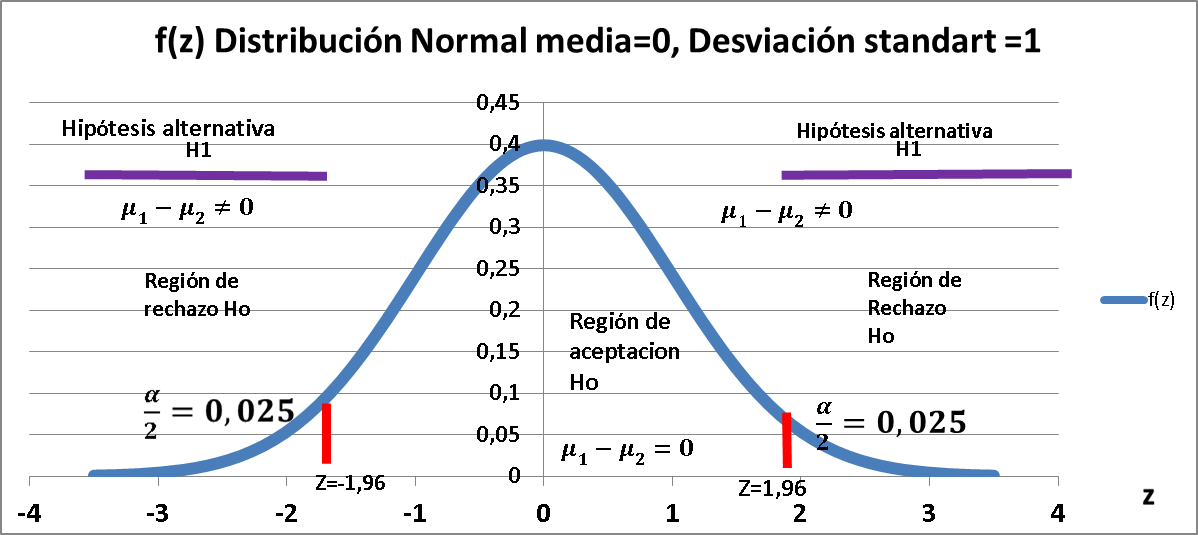

In [ ]:
from IPython.display import Image
Image('grafico 4 prueba de hipotesis.png')

**Podemos afirmar que sí existe diferencia significativa entre los créditos de consumo otorgados a las mujeres que a los hombres, con un intervalo de confianza del 95% con un error tipo 1 llamado alpha $\alpha$ del 5%** 

**Páginas para descargar datos libres.**

**Páginas para descargar datos libres Colombia.**

https://www.datos.gov.co/<br> https://datosabiertos.bogota.gov.co/<br> http://medata.gov.co/
https://datosabiertos.metropol.gov.co/<br> https://datos.cali.gov.co/

**Páginas para descargar datos libres fuera de Colombia.**

https://www.kaggle.com/datasets <br>https://archive.ics.uci.edu/ml/index.php <br>https://www.data.gov/<br>
https://aws.amazon.com/datasets